# 1. Merging Annotations


##  1.1 PLoS Methods

- merge annotatios of software usage and purpose in PLoS files
- Write merged annotations to a new folder **SoMeSci/PLoS_methodsClean/**
- create a DataFRame for merged annotation in PLoS

In [1]:
import os
from os import listdir
from os.path import isfile, join


# we are interested only on annotations set of:  (software_usage and purpose annotations)

interest_list = ['Application_Usage','ProgrammingEnvironment_Usage',
                 'PlugIn_Usage','OperatingSystem_Usage', 'Purpose_Analysis',
                 'Purpose_Modelling', 'Purpose_Stimulation', 
                 'Purpose_DataCollection', 'Purpose_DataPreProcss', 
                 'Purpose_Simulation', 'Purpose_Visualization', 'Purpose_Programming', 
                 'Application_Creation', 'PlugIn_Creation',
                 'Application_Deposition', 'PlugIn_Deposition', 'SoftwareCoreference_Deposition',
                 'Application_Mention','ProgrammingEnvironment_Mention','OperatingSystem_Mention','PlugIn_Mention',
                 'Version','Developer', 'URL', 'License','Citation', 'Abbreviation', 'AlternativeName', 'Release', 'Extension']

# file path
path = 'SoMeSci/PLoS_methods/'

# gather list of .ann PLoS_methods files ---------------------------------------------
PLOS_filesList = []

# iterating over all files in the dir
for file_name in os.listdir(path):
    
    # if the file is .ann
    if file_name.endswith('.ann'):
        PLOS_filesList.append(file_name)
    else:
        continue

PLOS_filesList.sort() 

print('.ann PLosMethods file count : ', len(PLOS_filesList), '\n')
print('Firts 5 files: ',PLOS_filesList[:5])

# gather list of .ann PLoS_methods files ---------------------------------------------

.ann PLosMethods file count :  480 

Firts 5 files:  ['PMC1088287.ann', 'PMC1657052.ann', 'PMC1831734.ann', 'PMC1880851.ann', 'PMC1939732.ann']


In [2]:
"""

There are different kinds of annotations in the .ann file. 
-----------------------------------------------------------

TYPES OF ANNOTATIONS

T - text bound annotations
R - relations
E - event
A - attribute
M - modification
N - Normalization 
-----------------------------------------------------------

We are interested in "text bound annotations only" that indicate software_usage and software_purpose.

Therefore get a list of all annotations in the .ann file iff:
        
        1. annotations are text bound ( start with T) & 
        2. annotations indicate software_usage or software_purpose
        
the result is then stored in a dictionary 

where,

    key of dict == name of the file 
    Value of dict == list of list of annotation lines in the file
"""

# stores ORIGIAL list of annotations in a file (BEFORE MERGING)
fileAn_dict = {}

# store all annotations in the file ( format: list-of-list)
annotation_filelist = []

# loop over each file 
for indx, file in enumerate(PLOS_filesList[:]):
    
    # path to each file
    file_path = path + file
    
    with open(file_path, "r") as a_file:
        
        # stores annotation line 
        annotation_line = []
        
        
        # check if the annotation is what we want (usage, purpose, starts with T )
        for line in a_file:
            
            # grab the type of annotation
            annotataion = line.split()[1:2][0]
            
            
            if (line.startswith('T') & (annotataion in interest_list)):

                if ( line.split()[2:4] ) not in annotation_line: 
                    
                    #print(line.split()[2:4])
                    
                    annotation_line.append(line.split())
                    #print(indx, file, line.split())

                else:
                    pass
        
        fileAn_dict[file] = annotation_line     
        
#fileAn_dict

print('The size of the mapping dictionary: ', len(fileAn_dict))
print('ALl files included!')

The size of the mapping dictionary:  480
ALl files included!


### Merger Function

Merges usage and purpose annotations into  `Type_Usage:Purpose_PurposeX`. 


- for example : `Application_Usage:Purpose_Analysis`

In [3]:
'''

each annotation line has a form of:

     [Tx | Annotation | START | STOP | nameOfSoftware]
     
     example: 'T2', 'Application_Usage', '13536', '13539', 'SAS'

mergeList() merges two lines of annotations if their start is the same

'''

def mergeList(list_1, list_2):
    
    #stores merged annotations
    result_list = []
    
    '''
    
     list_1[2:3] is START number 
     merge two annotations if their start number is the same
    
    '''
    
    for x, y in [(x,y) for x in list_1[2:3] for y in list_2[2:3]]:
        
        
        
        # if the starting positions are the same x=y
        if( x == y):
            
            #print(x)
            
            #get id of the firt annotation 
            result_list.append(list_1[0])
            
            #merge annotations by :
            result_list.append(list_1[1]+':'+list_2[1])
            
            # start number
            result_list.append(list_1[2])
            
            #end number
            result_list.append(list_1[3])
            
            # get name of the software
            software_name_splitted = list_1[4:]
            software_name_joined = ' '.join(software_name_splitted)
            
            result_list.append(software_name_joined)
    
            
        else:
            pass
    return result_list

#### Merging purpose annotations

In [4]:
# stores MERGED LIST of annotations in each file
merged_dict = {}

#stores list of list of all annotations
all_annotations_list = []


# for each file in the dict
for key in list(fileAn_dict)[:]:
    
    # stores list of merged annotations
    merged_annotationlist_perfile = []
    
    #print(key)
    """
    compare all annotations to each other and grab those that share the same "start number"
    
    """
    
    lookup_list1 = []
    for ls1 in fileAn_dict.get(key):
            
            
            lookup_list2 = []
            for ls2 in fileAn_dict.get(key):
                
                
                # compare each annotation with another but not to itself
                if (ls1 != ls2) :
                    
                    
                    # merge annotations
                    r = mergeList(ls1,ls2)
                    
                    # if the 
                    if len(r) !=0 :
                        
                        #print(ls1[0],ls2[0], ls1[2:4], ls2[2:4])
                        
         
                        if (r[2] not in lookup_list1 ) | (r[3] not in lookup_list1 ):
                            
                            merged_annotationlist_perfile.append(r) 
                            all_annotations_list.append(r)
                            
                            lookup_list2.extend(r[2:4])
                            
                        else:
                            pass
            # save already merged list on the lookup list            
            lookup_list1.extend(lookup_list2)  
            #break
                        
                        
    merged_dict[key] = merged_annotationlist_perfile

In [5]:
for file in list(merged_dict)[:]:
    print('file:', file, '|',merged_dict.get(file), '\n\n')

file: PMC1088287.ann | [] 


file: PMC1657052.ann | [['T1', 'Application_Usage:Purpose_Modelling', '3670', '3681', 'DS modeling'], ['T2', 'Application_Usage:Purpose_DataCollection', '5677', '5683', 'pCLAMP'], ['T3', 'Application_Usage:Purpose_Analysis', '1203', '1211', 'ENSEMBLE']] 


file: PMC1831734.ann | [['T1', 'Application_Usage:Purpose_DataCollection', '1447', '1450', 'RIU'], ['T2', 'Application_Usage:Purpose_Analysis', '8512', '8517', 'Stata']] 


file: PMC1880851.ann | [] 


file: PMC1939732.ann | [['T1', 'Application_Usage:Purpose_Modelling', '1984', '1990', 'AsReml'], ['T2', 'ProgrammingEnvironment_Usage:Purpose_Stimulation', '7238', '7244', 'MATLAB'], ['T3', 'Application_Usage:Purpose_Analysis', '7300', '7306', 'AsReml']] 


file: PMC2002515.ann | [['T1', 'Application_Usage:Purpose_Analysis', '12585', '12588', 'SAS'], ['T2', 'Application_Usage:Purpose_Analysis', '13536', '13539', 'SAS']] 


file: PMC2134966.ann | [['T1', 'Application_Usage:Purpose_Visualization', '874', '886

file: PMC3509097.ann | [['T1', 'Application_Usage:Purpose_DataPreProcss', '703', '707', 'MEGA'], ['T2', 'Application_Usage:Purpose_DataPreProcss', '804', '808', 'MEGA']] 


file: PMC3509157.ann | [['T2', 'Application_Usage:Purpose_Visualization', '4713', '4720', 'Protégé'], ['T3', 'Application_Usage:Purpose_Analysis', '5178', '5185', 'OntoFox'], ['T4', 'Application_Usage:Purpose_Visualization', '5251', '5258', 'Protégé']] 


file: PMC3514170.ann | [['T1', 'Application_Usage:Purpose_Analysis', '3213', '3216', 'JMP']] 


file: PMC3515570.ann | [] 


file: PMC3515589.ann | [['T1', 'Application_Usage:Purpose_DataPreProcss', '6897', '6918', 'Brain Vision Analyzer'], ['T2', 'Application_Usage:Purpose_DataPreProcss', '7632', '7654', 'FMRIB Software Library'], ['T3', 'Application_Usage:Purpose_DataPreProcss', '8187', '8190', 'FSL'], ['T4', 'Application_Usage:Purpose_DataPreProcss', '8103', '8106', 'FSL'], ['T5', 'Application_Usage:Purpose_Analysis', '12573', '12576', 'FSL'], ['T6', 'Applicatio

file: PMC5065233.ann | [] 


file: PMC5070780.ann | [['T1', 'Application_Usage:Purpose_DataCollection', '3756', '3762', 'FastQC'], ['T2', 'Application_Usage:Purpose_DataPreProcss', '3828', '3839', 'Trimmomatic'], ['T3', 'Application_Usage:Purpose_DataPreProcss', '4181', '4185', 'STAR'], ['T4', 'Application_Usage:Purpose_DataPreProcss', '4274', '4282', 'Samtools'], ['T5', 'Application_Usage:Purpose_Analysis', '4737', '4745', 'Mirdeep2'], ['T6', 'Application_Usage:Purpose_DataCollection', '4994', '4999', 'BLAST'], ['T7', 'Application_Usage:Purpose_DataCollection', '5113', '5121', 'Mirdeep2'], ['T8', 'ProgrammingEnvironment_Usage:Purpose_Analysis', '5429', '5430', 'R'], ['T9', 'PlugIn_Usage:Purpose_Analysis', '5456', '5461', 'edgeR'], ['T10', 'PlugIn_Usage:Purpose_Analysis', '5468', '5473', 'vegan'], ['T11', 'PlugIn_Usage:Purpose_Analysis', '5483', '5489', 'gplots'], ['T12', 'ProgrammingEnvironment_Usage:Purpose_Modelling', '5664', '5665', 'R'], ['T13', 'PlugIn_Usage:Purpose_Modelling', '

### PLoS:  writing merged annotations to  `PLoS_methodsClean` folder

In [6]:
for file in list(merged_dict):
    
    path2 = 'SoMeSci/PLoS_methodsClean/'
    file_path = path2 + file
    
    #print(file_path)
    
    with open(file_path, "w") as f1:
        
        
        for line in merged_dict.get(file):
            #print(line)
            
            txt = '\t'.join(line)
            
            #print('Writing To ->',file, '<-',txt)
            
            #write merged annotation to the file 
            f1.write(txt+ '\n')
            
        #print("-------------------------------------------------")




# fileAn_dict -> contains file name -vs- list of  (original) annotations 


print("# of files with ORIGINAL annotations:", len(fileAn_dict))

print("# of files with MERGED annotations:", len(merged_dict))

# merged_dict -> contains file name -vs- list of  (merged) annotations 

# of files with ORIGINAL annotations: 480
# of files with MERGED annotations: 480


In [7]:
print(line)

['T1', 'Application_Usage:Purpose_Analysis', '12922', '12925', 'SAS']


### `PLoS` : writing merged annotation  Into a Data Frame

In [8]:
import pandas as pd

df_PLOS = pd.DataFrame(columns=['code', 'annotation','start','stop','software'], data=all_annotations_list)
#df_PLOS

### Save the df_PLOS image

In [9]:
# get head and tail of the df
PLOS_head = df_PLOS.head(10)
PLOS_tail = df_PLOS.tail(10)


import dataframe_image as dfi


PLOS_head = PLOS_head.style.background_gradient()
dfi.export(PLOS_head,"PLOS_head_.png")

PLOS_tail = PLOS_tail.style.background_gradient()
dfi.export(PLOS_tail,"PLOS_tail_.png")

df_PLOS.to_csv(r'PLOS_.csv', index = False)

[0115/214018.734855:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214018.891940:INFO:headless_shell.cc(653)] Written to file /tmp/tmph0cif6s0/temp.png.
[0115/214019.062941:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214019.239267:INFO:headless_shell.cc(653)] Written to file /tmp/tmp5kvf_xr0/temp.png.


## 1.2. PubMed Full Text

In [10]:
import os
from os import listdir
from os.path import isfile, join


interest_list = ['Application_Usage','ProgrammingEnvironment_Usage','PlugIn_Usage','OperatingSystem_Usage', 'Purpose_Analysis','Purpose_Modelling', 'Purpose_Stimulation', 
                 'Purpose_DataCollection', 'Purpose_DataPreProcss', 'Purpose_Simulation', 'Purpose_Visualization', 
                 'Purpose_Programming', 'Application_Creation', 'PlugIn_Creation',
                 'Application_Deposition', 'PlugIn_Deposition', 'SoftwareCoreference_Deposition',
                 'Application_Mention','ProgrammingEnvironment_Mention','OperatingSystem_Mention','PlugIn_Mention',
                 'Version','Developer', 'URL', 'License','Citation', 'Abbreviation', 'AlternativeName', 'Release', 'Extension']


#  1. get a list of PubMed file names---------------------------------------------------------------------

mypath = "SoMeSci/Pubmed_fulltext/"

Pubmed_filesList = []
  
# iterating over all files in the dir
for file_name in os.listdir(mypath):
    
    # if the file is .ann
    if file_name.endswith('.ann'):
        Pubmed_filesList.append(file_name)
    else:
        continue

Pubmed_filesList.sort() 

#print('First 5 files: ',Pubmed_filesList[:5])


# 2. get file name and list of annotations into a dict-------------------------------------------------------


# stores ORIGIAL list of annotations in a file (BEFORE MERGING)
fileAn_dict2 = {}

# store all annotations in the file ( format: list-of-list)
annotation_filelist2 = []

# loop over each file 
for indx, file in enumerate(Pubmed_filesList[:]):
    
    # path to each file
    file_path = mypath + file
    
    with open(file_path, "r") as a_file:
        
        # stores annotation line 
        annotation_line2 = []
        
        
        # check if the annotation is what we want (usage, purpose, starts with T )
        for line in a_file:
            
            # grab the type of annotation
            annotataion = line.split()[1:2][0]
            
            if (line.startswith('T') & (annotataion in interest_list)):

                if ( line.split()[2:4] ) not in annotation_line2: 
                    
                    annotation_line2.append(line.split())
                    #print(indx, file, line.split())

                else:
                    pass
        
        fileAn_dict2[file] = annotation_line2     
        
# 3. Merge annotations -----------------------------------------------------------------------


#store all merged annotations with a file name 
# stores MERGED LIST of annotations in each file
merged_dict2 = {}

#stores list of list of all annotations
all_annotations_list2 = []


# for each file in the dict
for key in list(fileAn_dict2):
    
    # stores list of merged annotations
    merged_annotationlist_perfile2 = []
    #print(key)
    """
    compare all annotations to each other and grab those that share the same "start number"
    
    """
    
    lookup_list1 = []
    for ls1 in fileAn_dict2.get(key):
            
            
            lookup_list2 = []
            for ls2 in fileAn_dict2.get(key):
                
                
                # compare each annotation with another but not to itself
                if (ls1 != ls2) :
                    
                    
                    # merge annotations
                    r = mergeList(ls1,ls2)
                    
                    
                    
                    # if the 
                    if len(r) !=0 :
                        #print(ls1[0],ls2[0], ls1[2:4], ls2[2:4])
         
                        if (r[2] not in lookup_list1 ) | (r[3] not in lookup_list1 ):
                            
                            merged_annotationlist_perfile2.append(r) 
                            all_annotations_list2.append(r)
                            
                            
                            lookup_list2.extend(r[2:4])
                            
                        else:
                            pass
            # save already merged list on the lookup list            
            lookup_list1.extend(lookup_list2)  
            #break
                        
                        
    merged_dict2[key] = merged_annotationlist_perfile2

In [11]:
for file in list(merged_dict2)[:]:
    print('file name:', file, '|  ',merged_dict2.get(file), '\n\n')

file name: PMC1240430.ann |   [] 


file name: PMC2790482.ann |   [['T1', 'Application_Usage:Purpose_Analysis', '15525', '15534', 'SigmaStat'], ['T3', 'OperatingSystem_Usage:Purpose_Analysis', '15544', '15551', 'Windows'], ['T5', 'Application_Usage:Purpose_DataCollection', '23622', '23636', 'Image-Pro Plus'], ['T7', 'OperatingSystem_Usage:Purpose_DataCollection', '23645', '23652', 'Windows'], ['T10', 'Application_Usage:Purpose_DataCollection', '23735', '23744', 'Scope-Pro'], ['T11', 'OperatingSystem_Usage:Purpose_DataCollection', '23753', '23760', 'Windows'], ['T14', 'Application_Usage:Purpose_DataPreProcss', '24827', '24830', 'IPP'], ['T15', 'Application_Usage:Purpose_Visualization', '24913', '24922', 'Photoshop'], ['T20', 'Application_Usage:Purpose_DataPreProcss', '25136', '25139', 'IPP'], ['T21', 'Application_Usage:Purpose_DataPreProcss', '25842', '25854', 'Office Excel'], ['T25', 'Application_Usage:Purpose_Visualization', '25983', '25992', 'SigmaPlot'], ['T27', 'OperatingSystem_Usa

In [12]:
print('size of merged annotatioon list: ', len(all_annotations_list2), '\n')

print('merged annotation list overview:')
all_annotations_list2[:1]

size of merged annotatioon list:  392 

merged annotation list overview:


[['T1', 'Application_Usage:Purpose_Analysis', '15525', '15534', 'SigmaStat']]

### `PubMed`:  writing merged annotations to `Pubmed_fulltext_Clean`

In [13]:
for file in list(merged_dict2):
    
    path2 = 'SoMeSci/Pubmed_fulltext_Clean/'
    file_path = path2 + file
    
    #print(file_path)
    
    with open(file_path, "w") as f1:
        
        
        for line in merged_dict2.get(file):
            
            txt = '\t'.join(line)
            
            print('Writing To ->',file, '<-',txt)
            
            #write merged annotation to the file 
            f1.write(txt+ '\n')
            
        print("-------------------------------------------------")




# fileAn_dict -> contains file name -vs- list of  (original) annotations 


print("# of files with ORIGINAL annotations:", len(fileAn_dict2))

print("# of files with MERGED annotations:", len(merged_dict2))

# merged_dict -> contains file name -vs- list of  (merged) annotations 

-------------------------------------------------
Writing To -> PMC2790482.ann <- T1	Application_Usage:Purpose_Analysis	15525	15534	SigmaStat
Writing To -> PMC2790482.ann <- T3	OperatingSystem_Usage:Purpose_Analysis	15544	15551	Windows
Writing To -> PMC2790482.ann <- T5	Application_Usage:Purpose_DataCollection	23622	23636	Image-Pro Plus
Writing To -> PMC2790482.ann <- T7	OperatingSystem_Usage:Purpose_DataCollection	23645	23652	Windows
Writing To -> PMC2790482.ann <- T10	Application_Usage:Purpose_DataCollection	23735	23744	Scope-Pro
Writing To -> PMC2790482.ann <- T11	OperatingSystem_Usage:Purpose_DataCollection	23753	23760	Windows
Writing To -> PMC2790482.ann <- T14	Application_Usage:Purpose_DataPreProcss	24827	24830	IPP
Writing To -> PMC2790482.ann <- T15	Application_Usage:Purpose_Visualization	24913	24922	Photoshop
Writing To -> PMC2790482.ann <- T20	Application_Usage:Purpose_DataPreProcss	25136	25139	IPP
Writing To -> PMC2790482.ann <- T21	Application_Usage:Purpose_DataPreProcss	258

### `PubMed` : writing merged annotation  Into a Data Frame

In [14]:
import pandas as pd

PubMed = pd.DataFrame(columns=['code', 'annotation','start','stop','software'], data=all_annotations_list2)
PubMed

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Analysis,15525,15534,SigmaStat
1,T3,OperatingSystem_Usage:Purpose_Analysis,15544,15551,Windows
2,T5,Application_Usage:Purpose_DataCollection,23622,23636,Image-Pro Plus
3,T7,OperatingSystem_Usage:Purpose_DataCollection,23645,23652,Windows
4,T10,Application_Usage:Purpose_DataCollection,23735,23744,Scope-Pro
...,...,...,...,...,...
387,T3,PlugIn_Usage:Purpose_Analysis,12485,12501,OptimalCutpoints
388,T4,Application_Usage:Purpose_Modelling,11761,11766,Blast
389,T7,Application_Usage:Purpose_Modelling,11814,11820,Primer
390,T1,Application_Usage:Purpose_DataPreProcss,11418,11429,Trimmomatic


### Save the df image

In [15]:
import dataframe_image as dfi

PubMed_head = PubMed.head(10)
PubMed_tail = PubMed.tail(10)

# save image of head
PubMed_head = PubMed_head.style.background_gradient()
dfi.export(PubMed_head,"PubMed_head_.png")

# save image of tail
PubMed_tail = PubMed_tail.style.background_gradient()
dfi.export(PubMed_tail,"PubMed_tail_.png")


PubMed.to_csv(r'PubMed_.csv', index = False)

[0115/214019.623508:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214019.786920:INFO:headless_shell.cc(653)] Written to file /tmp/tmp23w4_6iq/temp.png.
[0115/214019.974999:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214020.196093:INFO:headless_shell.cc(653)] Written to file /tmp/tmpv2tz6tve/temp.png.


## 1.3. Merging PLOS and PubMed DataFrames

In [16]:
df_PLOS

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Modelling,3670,3681,DS modeling
1,T2,Application_Usage:Purpose_DataCollection,5677,5683,pCLAMP
2,T3,Application_Usage:Purpose_Analysis,1203,1211,ENSEMBLE
3,T1,Application_Usage:Purpose_DataCollection,1447,1450,RIU
4,T2,Application_Usage:Purpose_Analysis,8512,8517,Stata
...,...,...,...,...,...
1450,T1,Application_Usage:Purpose_Analysis,6517,6524,G*Power
1451,T2,Application_Usage:Purpose_DataCollection,8352,8358,Enketo
1452,T4,Application_Usage:Purpose_DataCollection,8487,8493,Enketo
1453,T5,ProgrammingEnvironment_Usage:Purpose_Analysis,11462,11463,R


In [17]:
PubMed

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Analysis,15525,15534,SigmaStat
1,T3,OperatingSystem_Usage:Purpose_Analysis,15544,15551,Windows
2,T5,Application_Usage:Purpose_DataCollection,23622,23636,Image-Pro Plus
3,T7,OperatingSystem_Usage:Purpose_DataCollection,23645,23652,Windows
4,T10,Application_Usage:Purpose_DataCollection,23735,23744,Scope-Pro
...,...,...,...,...,...
387,T3,PlugIn_Usage:Purpose_Analysis,12485,12501,OptimalCutpoints
388,T4,Application_Usage:Purpose_Modelling,11761,11766,Blast
389,T7,Application_Usage:Purpose_Modelling,11814,11820,Primer
390,T1,Application_Usage:Purpose_DataPreProcss,11418,11429,Trimmomatic


In [18]:
# merge the two dfs

frames = [df_PLOS,PubMed]
PubMed_PLoS = pd.concat(frames)

# reset index
PubMed_PLoS = PubMed_PLoS.reset_index(drop=True)


# EXPORT RESULTS


# save image of head and tail
PubMed_PLoS_head = PubMed_PLoS.head(10)
PubMed_PLoS_tail = PubMed_PLoS.tail(10)


PubMed_PLoS_head = PubMed_PLoS_head.style.background_gradient()
dfi.export(PubMed_tail,"PubMed_PLoS_head_.png")

PubMed_PLoS_tail = PubMed_PLoS_tail.style.background_gradient()
dfi.export(PubMed_PLoS_tail,"PubMed_PLoS_tail_.png")

# save to csv
PubMed_PLoS.to_csv(r'PubMed_PLoS_.csv', index = False)

[0115/214020.446147:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214020.628372:INFO:headless_shell.cc(653)] Written to file /tmp/tmpo9p8w1nq/temp.png.
[0115/214020.828020:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0115/214021.018695:INFO:headless_shell.cc(653)] Written to file /tmp/tmp02oo577l/temp.png.


In [19]:
PubMed_PLoS

,code,annotation,start,stop,software
0,T1,Application_Usage:Purpose_Modelling,3670,3681,DS modeling
1,T2,Application_Usage:Purpose_DataCollection,5677,5683,pCLAMP
2,T3,Application_Usage:Purpose_Analysis,1203,1211,ENSEMBLE
3,T1,Application_Usage:Purpose_DataCollection,1447,1450,RIU
4,T2,Application_Usage:Purpose_Analysis,8512,8517,Stata
...,...,...,...,...,...
1842,T3,PlugIn_Usage:Purpose_Analysis,12485,12501,OptimalCutpoints
1843,T4,Application_Usage:Purpose_Modelling,11761,11766,Blast
1844,T7,Application_Usage:Purpose_Modelling,11814,11820,Primer
1845,T1,Application_Usage:Purpose_DataPreProcss,11418,11429,Trimmomatic


# 2. Analysis of Annotations


A deeper look into the annotated data. 

### Steps:

## 2.1 Pre-processing

- Co-Ref resolution of software entities : Handling software names that refer to the same software entity
- Format `PubMed_PLoS` dataframe in `NTP` format ... NameTypePurpose format.

## 2.2 Analysis annotations 

#### 2.1. from the software perspective: 

- How much software does appear only for a single purpose? 
- What type combinations appear for software? 

#### 2.2. from the type perspective: 

- How many different software is there per type? 
- Does any type just have few software? etc. 

### Co-ref resolution of software names

In [20]:
import json


list_SWLink = {}

keys_to_extract = ["mention", "link"]

with open('artifacts.json') as f:
    
    # d is list of dictionaries for each software
    d = json.load(f)
    
    # i is a dictionary for a goven software 
    for i in range(len(d)):
        
        #print(d[i])
        
        a_subset = {key: d[i][key] for key in keys_to_extract}
        
        #print(a_subset)
        
        #print("Key", a_subset["mention"], "Value",a_subset["link"] )
        
        swNam = a_subset["mention"]
        swLnk = a_subset["link"] 
        
        list_SWLink[swNam] = swLnk
    
        #break

In [21]:
list_SWLink

{'2LD': 'https://gaow.github.io/genetic-analysis-software/1/2ld',
 '3C Primer Design': 'http://www.pristionchus.org/3CPrimerDesign',
 '3dBandpass': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dBandpass.html',
 '3dClustsim': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dClustSim.html',
 '3dDeconvolve': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dDeconvolve.html',
 '3dDespike': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dDespike.html',
 '3dDetrend': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dDetrend.html',
 '3dFDR': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dFDR.html',
 '3dFWHMx': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dFWHMx.html',
 '3dmaskave': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dmaskave.html',
 '3dttest+ +': 'https://afni.nimh.nih.gov/pub/dist/doc/program_help/3dttest++.html',
 '3PD': 'http://www.pristionchus.org/3CPrimerDesign',
 '4Cin': 'https://github.com/batxes/4Cin',
 'Access': 'htt

### Finding All  Keys With the Same Value in a Python Dictionary

In [22]:
sw_nameVarations = {}

# store all software name variations as value and link as a key ( link is unique)

  
for key, value in list_SWLink.items():
    if value not in sw_nameVarations:
        sw_nameVarations[value] = [key]
    else:
        sw_nameVarations[value].append(key)

In [23]:
# example result for Matlab

for lnk in list(sw_nameVarations):
    
    if lnk == "https://www.wikidata.org/wiki/Q169478":
        print(sw_nameVarations.get(lnk)," resolves to ->",lnk)
    #break

['Matlab', 'MATLAB', 'MatLab', 'MATLB']  resolves to -> https://www.wikidata.org/wiki/Q169478


### Assign a single name for variation of software names

In [24]:
list_swNTP = []

for index, row in PubMed_PLoS.iterrows():
    
    softwareName = row['software']
    
    
     # resolve software names that refer to the same entity
    
    '''
    find the name of the software in the variations list
    and replace it with the first variation among the list
    '''
    
    for lnk in list(sw_nameVarations):
        if softwareName in sw_nameVarations.get(lnk):
            softwareName = sw_nameVarations.get(lnk)[0]
            
    softwareType_Purpose = row['annotation']
    
    swType = softwareType_Purpose.split(':')[0].split('_')[0]
    swPurp = softwareType_Purpose.split(':')[1].split('_')[1]
    
    
    lst_ = []
    
    lst_.append(softwareName)
    lst_.append(swType)
    lst_.append(swPurp)
    
    list_swNTP.append(lst_)
    
    print(f"{softwareName:{55}}| {swType:{22}}| {swPurp:{14}}")
    
    #break

DS modeling                                            | Application           | Modelling     
pClamp                                                 | Application           | DataCollection
Ensembl                                                | Application           | Analysis      
RIU                                                    | Application           | DataCollection
STATA                                                  | Application           | Analysis      
AsReml                                                 | Application           | Modelling     
Matlab                                                 | ProgrammingEnvironment| Stimulation   
AsReml                                                 | Application           | Analysis      
SAS                                                    | Application           | Analysis      
SAS                                                    | Application           | Analysis      
DS ViewerPro                            

fmsb                                                   | PlugIn                | Visualization 
Python                                                 | ProgrammingEnvironment| Programming   
GNU R                                                  | ProgrammingEnvironment| Programming   
READ                                                   | Application           | DataPreProcss 
READ                                                   | Application           | Analysis      
READ                                                   | Application           | Analysis      
READ                                                   | Application           | Modelling     
samtools                                               | Application           | Analysis      
vcftools                                               | Application           | Analysis      
PASW                                                   | Application           | Analysis      
AFNI                                    

### `PubMed_PLoS` Dataframe to  `NTP`  format  for Analysis 

`NTP` format is `Name`, `Type`, `Purpose` format 

In [25]:
#PubMed_PLoS

In [26]:
import pandas as pd

PubMedPLoS_swNTP = pd.DataFrame(columns=['Sw_Name', 'Type','Purpose'], data=list_swNTP)


PubMedPLoS_swNTP.reset_index

PubMedPLoS_swNTP

,Sw_Name,Type,Purpose
0,DS modeling,Application,Modelling
1,pClamp,Application,DataCollection
2,Ensembl,Application,Analysis
3,RIU,Application,DataCollection
4,STATA,Application,Analysis
...,...,...,...
1842,OptimalCutpoints,PlugIn,Analysis
1843,Basic Local Alignment Search Tool,Application,Modelling
1844,PRIMER,Application,Modelling
1845,Trimmomatic,Application,DataPreProcss


# 2.1. Software perspective: 

- How much software does appear only for a single purpose? 
- What type combinations appear for software? 

## Analysis #1: Software  `Name`

### Top software by Mention Count

In [27]:
PubMedPLoS_swN = PubMedPLoS_swNTP.groupby(['Sw_Name']).size().reset_index(name='Count')

PubMedPLoS_swN_dsc = PubMedPLoS_swN.sort_values(by=['Count'], ascending=False)

PubMedPLoS_swN_dsc

,Sw_Name,Count
378,PASW,129
209,GNU R,91
475,STATA,76
324,Matlab,68
457,SAS,52
...,...,...
264,Instat,1
260,ImpaxEE,1
257,Imagelab,1
256,ImageQuant TL,1


In [28]:
Top20_Sw = PubMedPLoS_swN_dsc.head(20)

Top20_Sw = Top20_Sw.set_index('Sw_Name')
Top20_Sw

,Count
Sw_Name,
PASW,129
GNU R,91
STATA,76
Matlab,68
SAS,52
SPM,40
Win,39
GraphPad,35
Excel,26


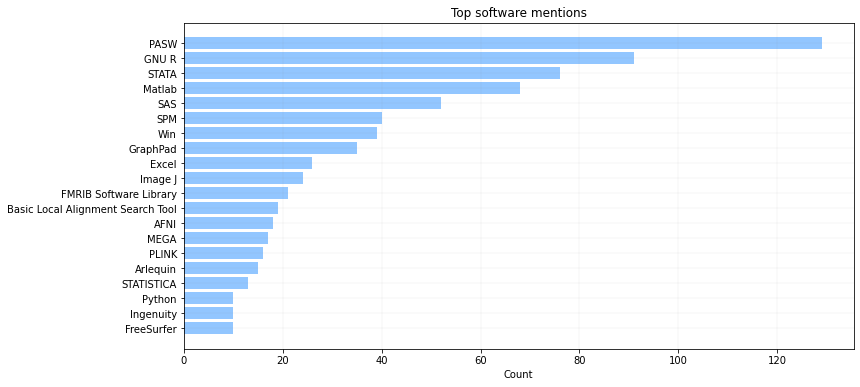

In [29]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-pastel")

fig, ax = plt.subplots(figsize=(12, 6))

Top20_Sw_ind = Top20_Sw['Count'].index
Top20_Sw_val = Top20_Sw['Count'].values

ax.barh(Top20_Sw_ind,Top20_Sw_val, align='center')

# labels
ax.set_title("Top software mentions")
ax.set_xlabel("Count")

ax.invert_yaxis()
plt.grid(color='grey', linestyle='-.', linewidth=0.1)
plt.show()

fig.savefig("1.Top software mentions.png", dpi = 130)

### Analysis #2: Software `Purpose`
 

In [30]:
SwP = PubMedPLoS_swNTP.groupby(['Purpose']).size().reset_index(name='Count')

SwP_dsc = SwP.sort_values(by=['Count','Purpose'], ascending=False)

SwP_dsc = SwP_dsc.set_index("Purpose")

SwP_dsc

,Count
Purpose,
Analysis,1035
DataPreProcss,246
DataCollection,174
Modelling,172
Visualization,99
Programming,56
Stimulation,43
Simulation,22


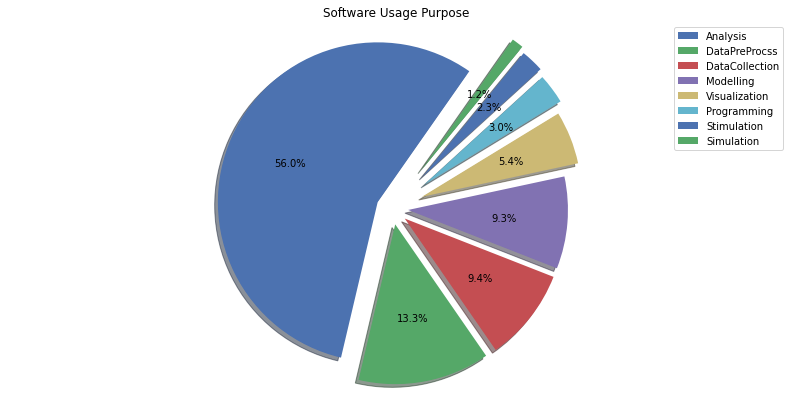

In [31]:
# visualize the shre of resources pie-chart

import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-deep")
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# Data to plot
label = SwP_dsc['Count'].index
valu_ = SwP_dsc['Count'].values

explode = (0.1, 0.1, 0.1,0.1,0.2,0.25,0.275, 0.3)  # explode 1st slice


plt.pie(valu_,explode=explode,autopct='%1.1f%%', shadow=True, startangle=55)

# annotate
plt.legend(label, loc="best")

ax.set_title("Software Usage Purpose ")
plt.axis('equal')
fig.savefig("2.Software Usage Purpose pie.png", dpi = 130)
plt.show()

/tmp/ipykernel_8659/186783385.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind_, rotation=15)


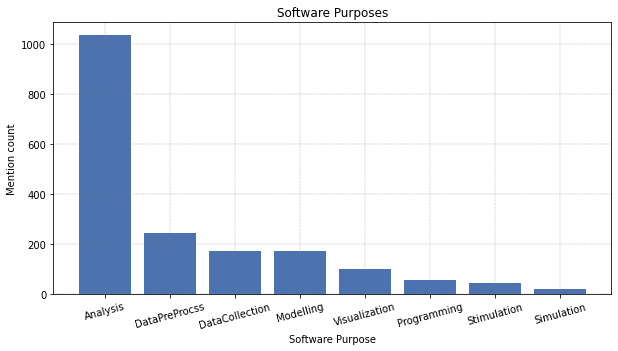

In [32]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-deep")

fig, ax = plt.subplots(figsize=(10, 5))



val_ = SwP_dsc['Count'].values
ind_ = SwP_dsc['Count'].index


ax.bar(ind_,val_, align='center')

# labels
ax.set_title("Software Purposes")
ax.set_xlabel("Software Purpose")
ax.set_ylabel("Mention count")

ax.set_xticklabels(ind_, rotation=15)

#ax.invert_yaxis()
plt.grid(color='grey', linestyle='-.', linewidth=0.3)
plt.show()

fig.savefig("3.Software Purposes.png", dpi = 130)

### Analysis #3: Software Type

### What type combinations appear for software? 


In [33]:
SwT = PubMedPLoS_swNTP.groupby(['Type']).size().reset_index(name='Count')
SwT_dsc = SwT.sort_values(by=['Count','Type'], ascending=False)

SwT_dsc = SwT_dsc.set_index('Type')
SwT_dsc

,Count
Type,
Application,1390
PlugIn,221
ProgrammingEnvironment,188
OperatingSystem,48


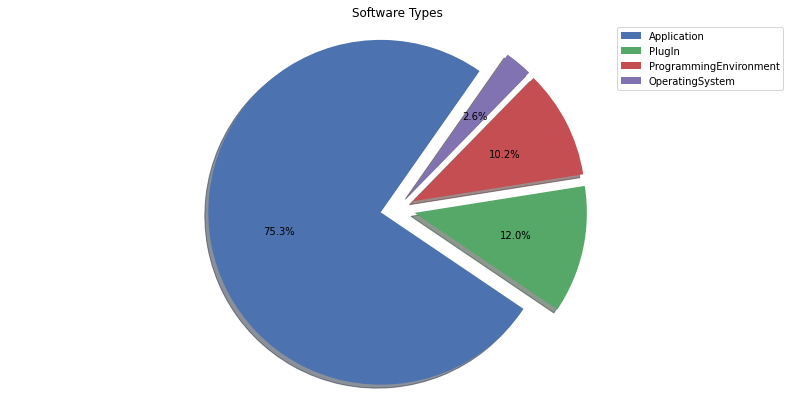

In [34]:
# visualize the shre of resources pie-chart

import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-deep")
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"))

# Data to plot
label = SwT_dsc['Count'].index
x = SwT_dsc['Count'].values

explode = (0.1, 0.1, 0.1,0.1)  # explode 1st slice


plt.pie(x,explode=explode,autopct='%1.1f%%', shadow=True, startangle=55)

# annotate
plt.legend(label, loc="best")

ax.set_title("Software Types")
plt.axis('equal')
fig.savefig("4.Software Types pie.png", dpi = 130)

plt.show()

####  How many different software is there per type? 
####  Does any type just have few software? etc. 

### Analysis #4: Software `Type, Purpose`


### software type in each purpose of usage

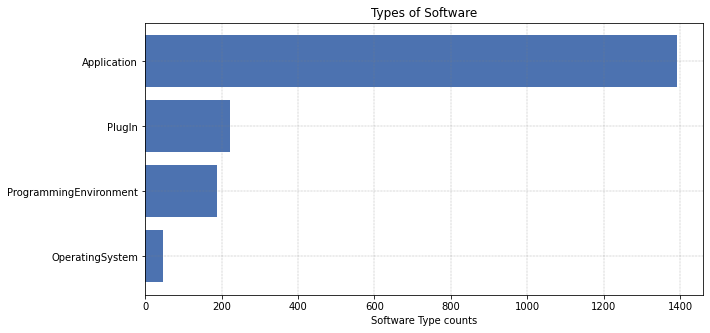

In [35]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-deep")

fig, ax = plt.subplots(figsize=(10, 5))



val_swt = SwT_dsc['Count'].values
ind_swt = SwT_dsc['Count'].index


ax.barh(ind_swt,val_swt, align='center')

# labels
ax.set_title("Types of Software")
ax.set_xlabel("Software Type counts")


ax.invert_yaxis()
plt.grid(color='grey', linestyle='-.', linewidth=0.3)
plt.show()

fig.savefig("5.Software Types bar.png", dpi = 130)

In [36]:
SwTP = PubMedPLoS_swNTP.groupby(['Type','Purpose']).size().reset_index(name='CountTP')

#SwTP_dsc = SwTP.sort_values(by=['Count','Type', 'Purpose'], ascending=False)

SwTP_dsc = SwTP.sort_values(by=['Purpose','Type'], ascending=True)


Analysis_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Analysis"]
DataColl_ = SwTP_dsc[SwTP_dsc["Purpose"] == "DataCollection"]

PreProcs_ = SwTP_dsc[SwTP_dsc["Purpose"] == "DataPreProcss"]
Modellin_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Modelling"]
Programm_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Programming"]
Simulatn_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Simulation"]
STimulan_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Stimulation"]
VIzualan_ = SwTP_dsc[SwTP_dsc["Purpose"] == "Visualization"]


'''

The data farmes have different shapes

Add 0 conts for consistency

'''


preprocc_row = {'Type':'OperatingSystem', 'Purpose':'DataPreProcss', 'CountTP':0}
PreProcs_ = PreProcs_.append(preprocc_row, ignore_index=True)
PreProcs_ = PreProcs_.sort_values(by=['Type'], ascending=True)
PreProcs_ = PreProcs_.set_index("Type")




Modellin_row = {'Type':'OperatingSystem', 'Purpose':'Modelling', 'CountTP':0}
Modellin_ = Modellin_.append(Modellin_row, ignore_index=True)
Modellin_ = Modellin_.sort_values(by=['Type'], ascending=True)
Modellin_ = Modellin_.set_index("Type")

Programm_row = {'Type':'OperatingSystem', 'Purpose':'Programming', 'CountTP':0}
Programm_ = Programm_.append(Programm_row, ignore_index=True)
Programm_ = Programm_.sort_values(by=['Type'], ascending=True)
Programm_ = Programm_.set_index("Type")


Simulatn_row = {'Type':'OperatingSystem', 'Purpose':'Simulation', 'CountTP':0}
Simulatn_ = Simulatn_.append(Simulatn_row, ignore_index=True)
Simulatn_ = Simulatn_.sort_values(by=['Type'], ascending=True)
Simulatn_ = Simulatn_.set_index("Type")


STimulan_ = STimulan_.set_index("Type")
VIzualan_ = VIzualan_.set_index("Type")
DataColl_ = DataColl_.set_index("Type")
Analysis_ = Analysis_.set_index("Type")


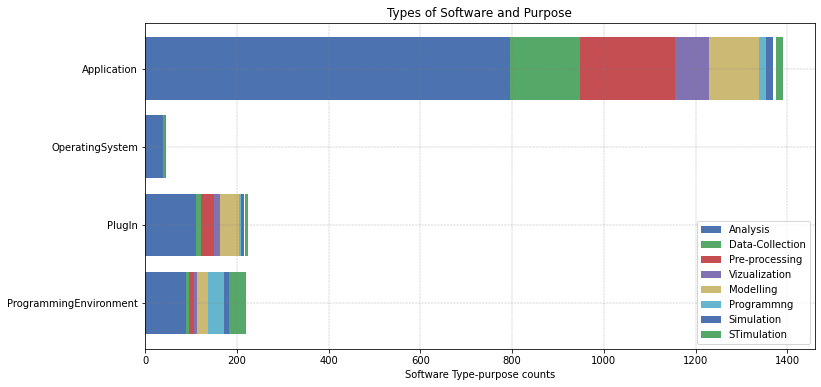

In [37]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-deep")

fig, ax = plt.subplots(figsize=(12, 6))

# plot analysis

A_ind= Analysis_['CountTP'].index
A_Val= Analysis_['CountTP'].values
ax.barh(A_ind,A_Val, align='center', label="Analysis" )

# Plot DC

DC_ind = DataColl_['CountTP'].index
DC_val = DataColl_['CountTP'].values

ax.barh(DC_ind, DC_val,left= A_Val, label="Data-Collection" )


# Plot Viz

pp_ind = PreProcs_['CountTP'].index
pp_val = PreProcs_['CountTP'].values

ax.barh(pp_ind, pp_val,left= A_Val+DC_val, label="Pre-processing" )


# Plot Viz

Viz_ind = VIzualan_['CountTP'].index
VIz_val = VIzualan_['CountTP'].values

ax.barh(Viz_ind, VIz_val,left= A_Val+DC_val+pp_val, label="Vizualization" )


# plot modelling

Modellin_ind = Modellin_['CountTP'].index
Modellin_val = Modellin_['CountTP'].values

ax.barh(Modellin_ind, Modellin_val,left= A_Val+DC_val+pp_val+VIz_val, label="Modelling" )


# plot programming

Programm_ind = Programm_['CountTP'].index
Programm_val = Programm_['CountTP'].values

ax.barh(Programm_ind, Programm_val,left= A_Val+DC_val+pp_val+VIz_val+Modellin_val, label="Programmng" )


# plot simulation

Simulatn_ind = Simulatn_['CountTP'].index
Simulatn_val = Simulatn_['CountTP'].values

ax.barh(Programm_ind, Programm_val,left= A_Val+DC_val+pp_val+VIz_val+Modellin_val+Programm_val, label="Simulation" )



# plot stimulation

STimulan_ind = STimulan_['CountTP'].index
STimulan_val = STimulan_['CountTP'].values

ax.barh(Programm_ind, Programm_val,left= A_Val+DC_val+pp_val+VIz_val+Modellin_val+Programm_val+STimulan_val, label="STimulation" )

ax.invert_yaxis()

ax.set_title("Types of Software and Purpose")
ax.set_xlabel("Software Type-purpose counts")

ax.legend()
plt.grid(color='grey', linestyle='-.', linewidth=0.3)
plt.show()

fig.savefig("6.Types of Software and Purpose stacked bar.png", dpi = 130)

### Analysis #5: Software `Name Purpose`

### - How much software does appear only for a single purpose? 

In [38]:
SwNP = PubMedPLoS_swNTP.groupby(['Sw_Name','Purpose']).size().reset_index(name='Count')



SwNP_dsc = SwNP.sort_values(by=['Count','Purpose','Sw_Name'], ascending=False)


"""

count all instances for all software with :

software with only single purpose 
software with two purpose 

...

software with 8 purpose 



"""
SwNP_dsc.head(10)

,Sw_Name,Purpose,Count
521,PASW,Analysis,120
658,STATA,Analysis,67
277,GNU R,Analysis,56
631,SAS,Analysis,46
767,Win,Analysis,32
447,Matlab,Analysis,31
313,GraphPad,Analysis,28
654,SPM,Analysis,24
279,GNU R,Modelling,14
335,Image J,Analysis,13


In [39]:
'''

we want to get all possible purposes a software is used for 

subset only software name and purpose 

'''

# example for Matlab 

swnp = SwNP_dsc[['Sw_Name', 'Purpose']]
swnp[swnp['Sw_Name'] == 'Matlab']

,Sw_Name,Purpose
447,Matlab,Analysis
453,Matlab,Stimulation
450,Matlab,Modelling
451,Matlab,Programming
449,Matlab,DataPreProcss
448,Matlab,DataCollection
452,Matlab,Simulation


In [40]:
sbs = swnp.groupby(["Sw_Name", "Purpose"])[["Sw_Name"]].count()

In [41]:
sbs

,,Sw_Name
Sw_Name,Purpose,
2LD,Analysis,1
3dBandpass,DataPreProcss,1
3dClustsim,Analysis,1
3dDeconvolve,Modelling,1
3dDespike,DataPreProcss,1
...,...,...
tnet,Analysis,1
tximport,Analysis,1
vcftools,Analysis,1


In [42]:
# list of tuple ('softwareName', 'Purpose')

liT = list(sbs['Sw_Name'].index)
liT

[('2LD', 'Analysis'),
 ('3dBandpass', 'DataPreProcss'),
 ('3dClustsim', 'Analysis'),
 ('3dDeconvolve', 'Modelling'),
 ('3dDespike', 'DataPreProcss'),
 ('3dDetrend', 'Analysis'),
 ('3dFDR', 'DataPreProcss'),
 ('3dFDR', 'Modelling'),
 ('3dFWHMx', 'Analysis'),
 ('3dmaskave', 'DataCollection'),
 ('3dttest+ +', 'Analysis'),
 ('3dttest+ +', 'DataCollection'),
 ('ADAPT', 'Simulation'),
 ('ADMIXMAP', 'Modelling'),
 ('AFNI', 'Analysis'),
 ('AFNI', 'DataCollection'),
 ('AFNI', 'DataPreProcss'),
 ('AFNI', 'Modelling'),
 ('AMBERTOOLS', 'Analysis'),
 ('AMIX', 'Analysis'),
 ('AMOS', 'Analysis'),
 ('ANNOVAR', 'DataPreProcss'),
 ('ART', 'Analysis'),
 ('ART', 'Modelling'),
 ('ASCAT', 'DataPreProcss'),
 ('ATLAS.ti', 'Analysis'),
 ('ATLAS.ti', 'DataPreProcss'),
 ('Access', 'DataCollection'),
 ('Acrobat', 'DataCollection'),
 ('ActiLife', 'DataPreProcss'),
 ('Actionscript', 'Programming'),
 ('Actiware', 'Analysis'),
 ('Advanced Normalization Tools', 'DataPreProcss'),
 ('Alogps', 'Simulation'),
 ('AlphaSim'

In [43]:
'''
create a dict that stores 

SoftwareName : list of purposes

'''

sw_name_purpose = {}


for sw_Name, sw_purposes in liT:
    
    sw_name_purpose.setdefault(sw_Name, []).append(sw_purposes)
    
#sw_name_purpose

In [44]:
'''
create a dict that stores 

SoftwareName : purpose count

'''

sw_pcount = {}

for sw in list(sw_name_purpose):
    sw_pcount[sw] = len(sw_name_purpose.get(sw))

In [45]:
pCount = pd.DataFrame(sw_pcount.items(), columns=['SwName', 'Purpose_Count'])
pCount

,SwName,Purpose_Count
0,2LD,1
1,3dBandpass,1
2,3dClustsim,1
3,3dDeconvolve,1
4,3dDespike,1
...,...,...
650,tnet,1
651,tximport,1
652,vcftools,1
653,waver,1


In [46]:
# aggregate by pcount

pCount_ag = pCount.groupby(['Purpose_Count']).size().reset_index(name='SoftwareCount')
pCount_ag = pCount_ag.set_index('Purpose_Count')
pCount_ag

,SoftwareCount
Purpose_Count,
1,503
2,106
3,31
4,9
5,4
6,1
7,1


In [47]:
# rename index for clarity on the visualization

pCount_ag = pCount_ag.rename(index={1: '1 Purpose', 
                                2: '2 Purpose',
                                3: '3 Purpose',
                                4: '4 Purpose',
                                5: '5 Purpose',
                                6: '6 Purpose',
                                7: '7 Purpose',
                                8: '8 Purpose',})

pCount_ag

,SoftwareCount
Purpose_Count,
1 Purpose,503
2 Purpose,106
3 Purpose,31
4 Purpose,9
5 Purpose,4
6 Purpose,1
7 Purpose,1


/tmp/ipykernel_8659/3615733149.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind_pc, rotation=15)


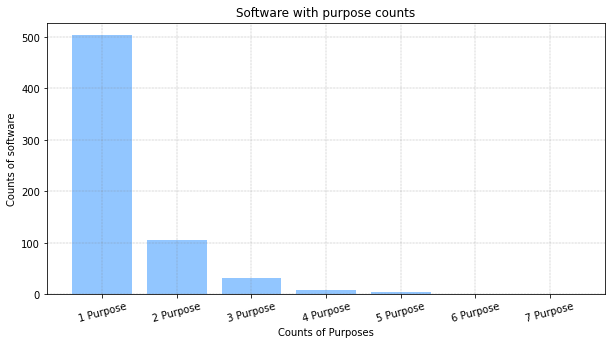

In [48]:
import matplotlib.pyplot as plt

# plot style
plt.style.use("seaborn-pastel")

fig, ax = plt.subplots(figsize=(10, 5))



val_pc = pCount_ag['SoftwareCount'].values
ind_pc = pCount_ag['SoftwareCount'].index


ax.bar(ind_pc,val_pc, align='center')


# labels
ax.set_title("Software with purpose counts")
ax.set_ylabel("Counts of software")
ax.set_xlabel("Counts of Purposes")

ax.set_xticklabels(ind_pc, rotation=15)


#ax.invert_yaxis()
plt.grid(color='grey', linestyle='-.', linewidth=0.3)
plt.show()

#fig.savefig("Software Types.png", dpi = 130)

### Analysis #6: Software `Name Type`

In [49]:
SwNT = PubMedPLoS_swNTP.groupby(['Sw_Name','Type']).size().reset_index(name='Count')



SwNT_dsc = SwNT.sort_values(by=['Count','Type', 'Sw_Name'], ascending=False)

SwNT_dsc

,Sw_Name,Type,Count
378,PASW,Application,129
209,GNU R,ProgrammingEnvironment,91
475,STATA,Application,76
324,Matlab,ProgrammingEnvironment,68
457,SAS,Application,52
...,...,...,...
14,AMIX,Application,1
13,AMBERTOOLS,Application,1
11,ADMIXMAP,Application,1
10,ADAPT,Application,1


### Analysis #7: Software `[Name, Type, Purpose]`

In [50]:

# Aggregate by multiple columns 


SwNTP_agg = PubMedPLoS_swNTP.groupby(['Sw_Name','Type', 'Purpose']).size().reset_index(name='Count')



SwNTP_agg_dsc = SwNTP_agg.sort_values(by=['Purpose','Type','Sw_Name'], ascending=True)

# top 10 Apps,PE, Os
SwNTP_agg_dsc.head(20)

,Sw_Name,Type,Purpose,Count
0,2LD,Application,Analysis,1
14,AFNI,Application,Analysis,4
18,AMBERTOOLS,Application,Analysis,1
19,AMIX,Application,Analysis,1
20,AMOS,Application,Analysis,1
25,ATLAS.ti,Application,Analysis,2
31,Actiware,Application,Analysis,1
37,Analyst,Application,Analysis,1
40,Aninhado,Application,Analysis,1
41,ArcGis,Application,Analysis,4


### BRAT to BIo

In [51]:
def brat_to_bio(text, annotation, process_unicode=True, replace_math=True, correct=True, corr_cite=True):
    """Transform a document annotated in BRAT format into a sentence based BIO format that also considers relations. 

    Args:
        text (string): plain text of the BRAT annotation (content of .txt file)
        
        annotati'on (string): BRAT annotation (content of .ann file)
        
        process_unicode (bool, optional): replace unicodes. Defaults to True.
        replace_math (bool, optional): replace math equations. Defaults to True.
        correct (bool, optional): replace string errors. Defaults to True.
        corr_cite (bool, optional): correct citation errors. Defaults to True.

    Returns:
        list of dictionaries: sentences information for each sentence in text 
    """
    annotation_dict = annotation_to_dict(annotation)
    if process_unicode:
        text, replacements = encode_string.handle_unicode_characters(text)
        _remove_characters(annotation_dict, replacements)
        _adjust_strings(annotation_dict, text)
    if replace_math:
        text, replacements = corrections.remove_math_expr(text)
        _replace_segments(annotation_dict, replacements)
        _adjust_strings(annotation_dict, text)
    if correct:
        text, replacements = corrections.correct_with_index(text)
        _add_characters(annotation_dict, replacements)
        _adjust_strings(annotation_dict, text)
    if corr_cite:
        text, switched_segments = corrections.correct_citations(text)
        _switch_characters(annotation_dict, switched_segments)
        _adjust_strings(annotation_dict, text)

    text, replacements = sentenize.normalize(text)
    _replace_segments(annotation_dict, replacements)
    _adjust_strings(annotation_dict, text)
    text, replacements = sentenize.sentenize_with_index(text)
    _add_characters(annotation_dict, replacements)
    _adjust_strings(annotation_dict, text)

    sentences = []
    sentence_match_objects = re.finditer(r'[^\n]+', text)
    for sentence in sentence_match_objects:
        sentence_string = sentence.group(0)
        sentence_entities = get_sentence_entities(sentence.span(0)[0], sentence.span(0)[1], annotation_dict)
        tokens = articlenizer.tokenize_text(sentence_string, 'spaces', False)
        tokens, names, labels = bio_annotate(tokens, sentence_entities)
        sentence_relations = get_sentence_relations(annotation_dict, sentence_entities)
        sentences.append({
            'string': sentence_string,
            'tokens': tokens,
            'names': names,
            'labels': labels,
            'entities': sentence_entities,
            'relations': sentence_relations
        })
    
    return sentences

In [52]:
import os

# file path
path = 'SoMeSci/PLoS_methodsClean/'


# iterating over all files in the dir
for file_name in os.listdir(path):
    
    file_path = path+file_name
    
    print('file path : ', file_path)
    
   
    
    break

file path :  SoMeSci/PLoS_methodsClean/PMC4596844.txt


In [53]:
 with open("PMC3004789.ann", "r") as ann_f:
        
        annotation = ann_f.read()
        
        lines = annotation.split("\n")
        
        #print(annotation)
        
        annotation_dict = {
                            'entities': {},
                            'relations': {}
                            }
        
        for line in lines:
            
            #print(line)
            if line.rstrip():
                
                line_split = line.split("\t")
                
                #print("lien split:",line_split)
                
                if line.startswith("T"):
                    
                    print("line split : ", line_split)
                    ann_label, ann_beg, ann_end = line_split[1].split()
                    
                    print(ann_label)
                    print(ann_beg)
                    print(ann_end)
                    print(line_split[0])
                    print(line_split[2])
                    print(line_split[1])
                    
                    annotation_dict["entities"][line_split[0]] = {
                    
                    "label" : ann_label,
                    'beg': int(ann_beg),
                    'end': int(ann_end),
                    'string': line_split[2].rstrip()
                    }

            break

line split :  ['T1', 'Application_Usage 4470 4473', 'JMP']
Application_Usage
4470
4473
T1
JMP
Application_Usage 4470 4473


In [54]:
annotation_dict

{'entities': {'T1': {'label': 'Application_Usage',
   'beg': 4470,
   'end': 4473,
   'string': 'JMP'}},
 'relations': {}}

In [55]:
annotation

'T1\tApplication_Usage 4470 4473\tJMP\nT2\tApplication_Usage 4475 4478\tJMP\nR1\tSpecification_of Arg1:T2 Arg2:T1\t\nT3\tVersion 4479 4482\t7.0\nR2\tVersion_of Arg1:T3 Arg2:T2\t\nT4\tDeveloper 4484 4502\tSAS Institute Inc.\nR3\tDeveloper_of Arg1:T4 Arg2:T2\t\n'

In [56]:
import os
print(os.path.splitext("PMC3004789.txt")[0])

PMC3004789


In [57]:
from articlenizer.formatting import brat_to_bio

In [58]:
with open("PMC3004789PP.ann", "r") as txt_f:

    ann_cont = txt_f.read()

    print(ann_cont)
    
with open("PMC3004789.txt", "r") as txt_f:
        
        txt_cont = txt_f.read()
        
        #print(txt_cont)
        

output = brat_to_bio(txt_cont, ann_cont)

T1	Application_Usage:Purpose_Analysis	4470	4473	JMP
T2	Application_Usage:Purpose_Analysis	4475	4478	JMP



In [59]:
output

[{'string': 'The study protocol was approved by the Ethics Committee of the International Foundation for the Albert Schweitzer Hospital in Lambarene.',
  'tokens': ['The',
   'study',
   'protocol',
   'was',
   'approved',
   'by',
   'the',
   'Ethics',
   'Committee',
   'of',
   'the',
   'International',
   'Foundation',
   'for',
   'the',
   'Albert',
   'Schweitzer',
   'Hospital',
   'in',
   'Lambarene',
   '.'],
  'names': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O'],
  'labels': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O'],
  'entities': {},
  'relations': {}},
 {'string': 'Written informed consent was sought from the mother and the guardian accompanying the patient to the hospital.',
  'tokens': ['Written',
   'informed',
   'consent',

In [60]:
from articlenizer.formatting import brat_to_bio

_bioPLos = {}

bio_lst = []

path = 'SoMeSci/PLoS_methodsClean/'

for fileName in PLOS_filesList[:]:
    
    # get file name without extension
    fName = fileName.split('.')[0]
    filePath = path+fName
    
    # open ann file 
    
    filePatha_nn = filePath+".ann"
    #print(filePatha_nn)
        
    with open(filePatha_nn, "r") as txt_f:
        ann_cont = txt_f.read()
        #print(fName)
           
    # open .txt file 
    
    filePatha_txt = filePath+".txt"
    #print(filePatha_txt)
       
    with open(filePatha_txt, "r") as txt_f:
        txt_cont = txt_f.read()
        #print(fName)
    
    output = brat_to_bio(txt_cont, ann_cont)
    
    _bioPLos[fName] = output
    
    bio_lst.append(output)

In [61]:
from articlenizer.formatting import brat_to_bio

_bioPub = {}


path = 'SoMeSci/Pubmed_fulltext_Clean/'

for fileName in Pubmed_filesList[:]:
    
    # get file name without extension
    fName = fileName.split('.')[0]
    filePath = path+fName
    
    # open ann file 
    
    filePatha_nn = filePath+".ann"
    #print(filePatha_nn)
        
    with open(filePatha_nn, "r") as txt_f:
        ann_cont = txt_f.read()
        #print(fName)
           
    # open .txt file 
    
    filePatha_txt = filePath+".txt"
    #print(filePatha_txt)
       
    with open(filePatha_txt, "r") as txt_f:
        txt_cont = txt_f.read()
        #print(fName)
    
    output = brat_to_bio(txt_cont, ann_cont)
    
    _bioPub[fName] = output
    bio_lst.append(output)

In [64]:
len(bio_lst)

580

In [65]:
len(_bioPub)

100

In [ ]:
with open("PMC3004789PP.ann", "r") as txt_f:

    ann_cont = txt_f.read()

    print(ann_cont)
    
with open("PMC3004789.txt", "r") as txt_f:
        
        txt_cont = txt_f.read()
        
        #print(txt_cont)
        

output = brat_to_bio(txt_cont, ann_cont)

In [ ]:
empty_list = []

a = ['abebe', 'beso']
b = ['1', '2']

empty_list.append(a)
empty_list.append(b)

In [ ]:
empty_list